In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random 
import tensorflow as tf
import cv2
from segmentation_models.metrics import iou_score
from keras.preprocessing.image import ImageDataGenerator
from segmentation_models import Unet
import segmentation_models as sm
import skimage.transform as trans
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [17]:
w,h = 256,256
batch_size = 16
BACKBONE = "resnet34"
preprocess_input = sm.get_preprocessing(BACKBONE)

In [18]:
path = "D:/hieu_dt/Nam3_KI_2/NCKH/Br35H-Mask-RCNN/"

In [19]:
import glob

In [20]:
# load images in file train 
train_images = glob.glob(path + "TRAIN/" + "*.jpg")
#train_mask = glob.glob(path + "TRAIN/" + "*.png")

#load images in file val
val_images = glob.glob(path + "VAL/" + "*.jpg")
#val_mask = glob.glob(path + "VAL/" + "*.png")

In [21]:
def read_image(image_path):
  image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  image = image / 255
  image = trans.resize(image,(256,256,3))
  image = preprocess_input(image)
  return image
def read_mask(image_path):
  image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  image = image /255
  image = trans.resize(image,(256,256,3))
  image[image != 0] = 1
  return image

In [22]:
model = Unet(BACKBONE,encoder_weights='imagenet',classes=1,input_shape=(256,256,3),activation='sigmoid',encoder_freeze=True)

In [23]:
model.load_weights("checkpoint.hdf5")

In [24]:
x_test = read_image(val_images[0])
x_test = np.array(x_test).astype('float32')
x_test = x_test[np.newaxis,:,:,:]

In [25]:
y_test = read_mask(val_images[0].replace('.jpg','.png'))
y_test = np.array(y_test).astype('float32')

In [26]:
y_pre = model.predict(x_test)

In [31]:
y_pre[0].shape

(256, 256, 1)

In [32]:
cv2.imshow("image",y_pre[0])

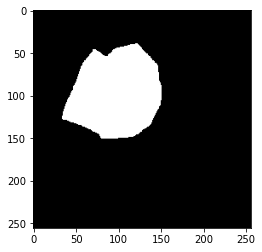

In [12]:
plt.imshow(y_test)
plt.show()

In [13]:
y_pre = trans.resize(y_pre[0],(256,256,3))
print(y_pre.shape)

(256, 256, 3)


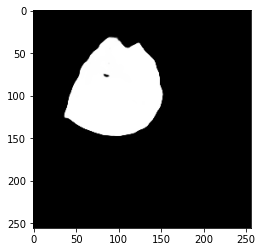

In [14]:
plt.imshow(y_pre)
plt.show()

In [15]:
cv2.imwrite("static/uploads/y0.png",y_pre)


True

In [23]:
test_images = glob.glob(path + "VAL/" + "*.jpg")

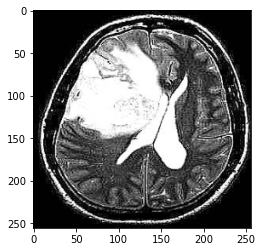

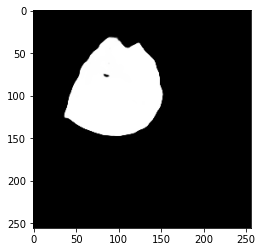

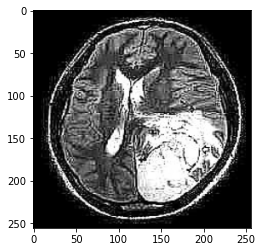

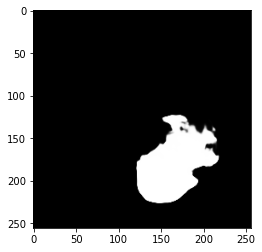

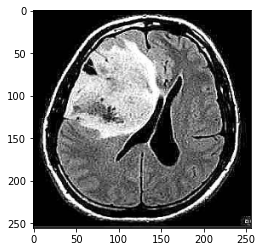

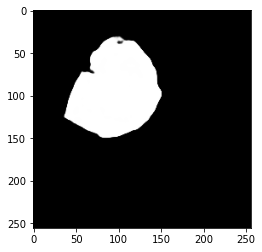

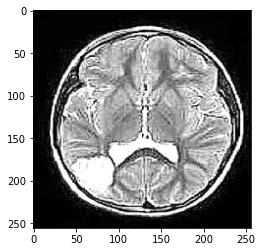

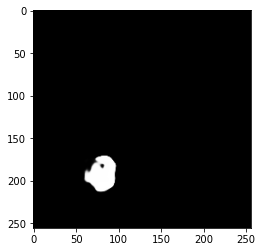

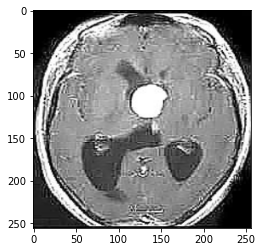

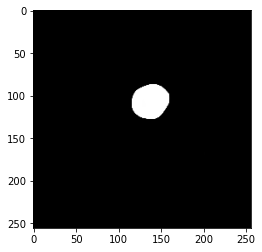

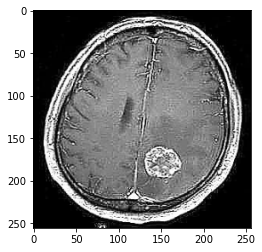

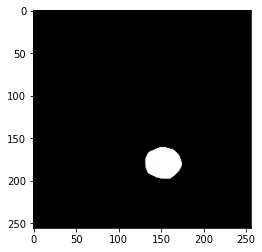

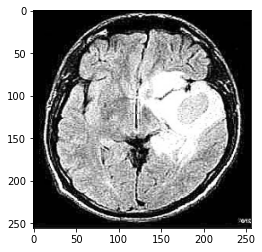

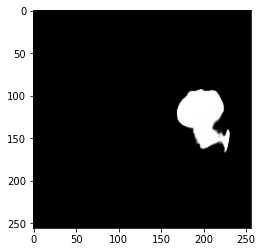

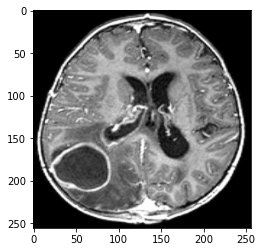

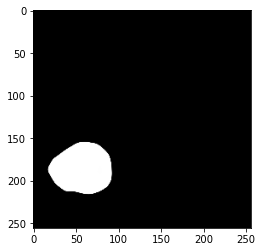

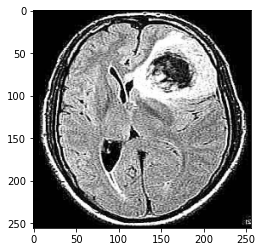

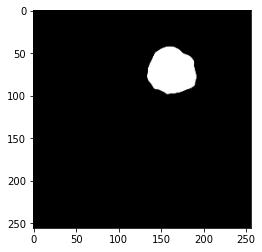

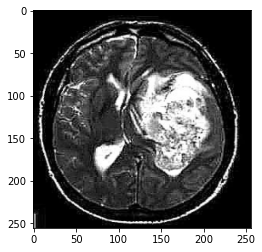

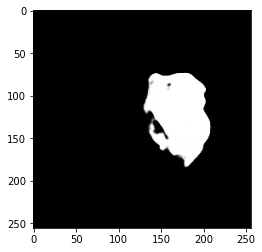

In [24]:

for id in range(10):
    image = read_image(test_images[id])
    image = np.array(image).astype('float32')
    plt.imshow(image)
    plt.show()
    image = image[np.newaxis,:,:,:]
    mask_pre = model.predict(image)
    mask_pre = trans.resize(mask_pre[0],(256,256,3))
    plt.imshow(mask_pre)
    plt.show()

    
    

